In [2]:
%cd /home/smalani/Cybernetic

from gardner_opto import pulse_integrator

pulse_integrator(verbose=True)

/home/smalani/Cybernetic


ImportError: cannot import name 'pulse_integrator' from 'gardner_opto' (/home/smalani/Cybernetic/gardner_opto.py)

In [1]:
import numpy as np

In [8]:
from scipy.optimize import fsolve
from scipy.optimize import root_scalar

theta = 0.530

## Circuit Parameters ##
tau_off = 30
tau_on = 5
n = 4

pulse_fun = lambda t: (t ** n) / (t ** n + tau_on ** n) - theta

sol = root_scalar(pulse_fun, bracket=[0, 100])

t_out = sol.root
print(t_out)

theta_out = (t_out ** n) / (t_out ** n + tau_on ** n)
print(theta_out)

5.15245855661072
0.5300000000000001


In [13]:
## Pulsing Parameters ##
pulse_period = 100
pulse_on = 20

## Circuit Parameters ##
tau_off = 30
tau_on = 5
n = 4

## Integration Parameters ##

t_start = 0
t_step = 1
t_end = 200



## Integration ##
t = 0
act_out = []
act_out.append(0)
t_out = []
t_out.append(0)
t_status = 0

while t < t_end:
    t = t + t_step
    t_phase = t % pulse_period
    if t_phase < pulse_on:
        if t_out[-1] % pulse_period > pulse_on:
            pulse_fun = lambda x: (x ** n) / (x ** n + tau_on ** n) - act_out[-1]
            # t_status = fsolve(pulse_fun, 100)
            sol = root_scalar(pulse_fun, bracket=[0, pulse_period])
            t_status = sol.root
            print('New t_status is: ' + str(t_status))
            # assert False
        act = (t_phase + t_status) ** n / ((t_phase + t_status) ** n + tau_on ** n)
    else:
        act = np.exp(-(t_phase - pulse_on) / tau_off)    
    t_out.append(t)
    act_out.append(act)
t_out = np.hstack(t_out)
act_out = np.hstack(act_out)

New t_status is: 2.6372639284956305
New t_status is: 2.6372639284956305


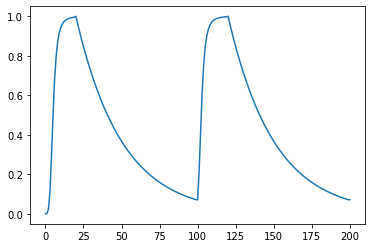

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_out, act_out)

In [15]:
print(t_phase)
print(np.exp(-(100 - 80) / 30))

0
0.513417119032592
